In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("veri.xlsx")

In [2]:
df['ürün'] = df.ürün.astype('category')
df['distributor'] = df.distributor.astype('category')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50830 entries, 0 to 50829
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   tarih                        50830 non-null  datetime64[ns]
 1   musteri_sayısı               50830 non-null  int64         
 2   litre maskelenmiş            50830 non-null  float64       
 3   gecen yıl litre maskelenmiş  50830 non-null  float64       
 4   ürün                         50830 non-null  category      
 5   distributor                  50830 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1)
memory usage: 1.7 MB


In [4]:
df.rename(columns={"tarih":"date","musteri_sayısı":"number_of_customer","litre maskelenmiş":"liters_sold","gecen yıl litre maskelenmiş":"liters_sold_lastYear","ürün":"product","distribütor":"distributor"},inplace=True)

In [5]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['week'] = df['date'].dt.isocalendar().week

In [6]:
df.head()

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week
0,2022-05-22,1698,5660.000000,6070.5,151679,10198,5,2022,20
1,2022-05-22,437,1456.666667,447.3,151679,11283,5,2022,20
2,2022-05-22,571,1903.333333,497.0,151679,10204,5,2022,20
3,2022-05-22,155,516.666667,0.0,151679,10713,5,2022,20
4,2022-05-22,666,2220.000000,4487.2,151679,20122,5,2022,20


In [7]:
df['season'] = np.where(df['month'].isin([12, 1, 2]), "winter",
                np.where(df['month'].isin([3, 4, 5]), "spring",
                np.where(df['month'].isin([6, 7, 8]), "summer", "autumn")))

In [8]:
df['lastDay_of_month'] = df['date'] + pd.offsets.MonthEnd(0)
df['firstDay_of_month'] = df['date'] - pd.offsets.MonthBegin(1)
df['lastWeek_of_month'] = df['lastDay_of_month'].dt.isocalendar().week
df['firstWeek_of_month'] = df['firstDay_of_month'].dt.isocalendar().week

In [9]:
df.head()

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week,season,lastDay_of_month,firstDay_of_month,lastWeek_of_month,firstWeek_of_month
0,2022-05-22,1698,5660.000000,6070.5,151679,10198,5,2022,20,spring,2022-05-31,2022-05-01,22,17
1,2022-05-22,437,1456.666667,447.3,151679,11283,5,2022,20,spring,2022-05-31,2022-05-01,22,17
2,2022-05-22,571,1903.333333,497.0,151679,10204,5,2022,20,spring,2022-05-31,2022-05-01,22,17
3,2022-05-22,155,516.666667,0.0,151679,10713,5,2022,20,spring,2022-05-31,2022-05-01,22,17
4,2022-05-22,666,2220.000000,4487.2,151679,20122,5,2022,20,spring,2022-05-31,2022-05-01,22,17


In [10]:
df['islastWeek_of_month'] = np.where(df['week'] == df['lastWeek_of_month'], 1, 0)
df['isFirstWeek_of_month'] = np.where(df['week'] == df['firstWeek_of_month'], 1, 0)
df['isNewYears_week'] = np.where(df['week'] == 1, 1, 0)
df['isEnd_of_yearWeek'] = np.where(df['week'] == 52, 1, 0)

In [11]:
df[5000:6000]

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week,season,lastDay_of_month,firstDay_of_month,lastWeek_of_month,firstWeek_of_month,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,isEnd_of_yearWeek
5000,2023-06-25,79,263.333333,0.0,151679,11453,6,2023,25,summer,2023-06-30,2023-06-01,26,22,0,0,0,0
5001,2023-06-25,84,280.000000,49.7,151679,11464,6,2023,25,summer,2023-06-30,2023-06-01,26,22,0,0,0,0
5002,2023-06-25,228,760.000000,56.8,151679,11468,6,2023,25,summer,2023-06-30,2023-06-01,26,22,0,0,0,0
5003,2023-06-25,396,1320.000000,1313.5,151679,11395,6,2023,25,summer,2023-06-30,2023-06-01,26,22,0,0,0,0
5004,2023-06-25,304,1013.333333,63.9,151679,11508,6,2023,25,summer,2023-06-30,2023-06-01,26,22,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2023-10-29,898,2993.333333,2087.4,151679,20047,10,2023,43,autumn,2023-10-31,2023-10-01,44,39,0,0,0,0
5996,2023-10-29,1698,5660.000000,2343.0,151679,10198,10,2023,43,autumn,2023-10-31,2023-10-01,44,39,0,0,0,0
5997,2023-10-29,461,1536.666667,276.9,151679,11589,10,2023,43,autumn,2023-10-31,2023-10-01,44,39,0,0,0,0
5998,2023-10-29,510,1700.000000,113.6,151679,11300,10,2023,43,autumn,2023-10-31,2023-10-01,44,39,0,0,0,0


In [12]:
df.loc[(df["date"]=="2022-07-10")]

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week,season,lastDay_of_month,firstDay_of_month,lastWeek_of_month,firstWeek_of_month,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,isEnd_of_yearWeek
653,2022-07-10,304,1013.333333,383.4,151679,11647,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0
654,2022-07-10,672,2240.000000,681.6,151679,19987,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0
655,2022-07-10,114,380.000000,312.4,151679,20159,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0
656,2022-07-10,651,2170.000000,5885.9,151679,9961,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0
657,2022-07-10,183,610.000000,568.0,151679,11516,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50126,2022-07-10,492,1640.000000,0.0,151371,20139,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0
50127,2022-07-10,1223,4076.666667,0.0,151371,20253,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0
50128,2022-07-10,666,2220.000000,0.0,151371,20122,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0
50129,2022-07-10,798,2660.000000,0.0,151371,19914,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0


In [13]:
holidays=["2022-07-09","2022-07-10","2022-07-11","2022-07-12",'2023-04-21', '2023-04-22', '2023-04-23', 
    '2023-06-28', '2023-06-29', '2023-06-30', '2023-07-01'
   , '2024-04-09', '2024-04-10',
    '2024-04-11', '2024-06-16', '2024-06-17',
    '2024-06-18', 
]

In [14]:
df['isHolidays'] = np.where((df['year'] == 2022) & (df['month'] == 7) & (df['week'] == 27)  | (df['year'] == 2023) & (df['month'] == 4) & (df['week'] == 16)  , 1, 0)
#buraya sadece veri setinde olan bayram günlerini ekledim.Olmayan günler için koşul eklemedim.

In [15]:
df.head()

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week,season,lastDay_of_month,firstDay_of_month,lastWeek_of_month,firstWeek_of_month,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,isEnd_of_yearWeek,isHolidays
0,2022-05-22,1698,5660.000000,6070.5,151679,10198,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
1,2022-05-22,437,1456.666667,447.3,151679,11283,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
2,2022-05-22,571,1903.333333,497.0,151679,10204,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
3,2022-05-22,155,516.666667,0.0,151679,10713,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
4,2022-05-22,666,2220.000000,4487.2,151679,20122,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0


In [16]:
df.loc[(df["isHolidays"]==1)][0:20]

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week,season,lastDay_of_month,firstDay_of_month,lastWeek_of_month,firstWeek_of_month,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,isEnd_of_yearWeek,isHolidays
653,2022-07-10,304,1013.333333,383.4,151679,11647,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0,1
654,2022-07-10,672,2240.000000,681.6,151679,19987,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0,1
655,2022-07-10,114,380.000000,312.4,151679,20159,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0,1
656,2022-07-10,651,2170.000000,5885.9,151679,9961,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0,1
657,2022-07-10,183,610.000000,568.0,151679,11516,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0,1
658,2022-07-10,427,1423.333333,4089.6,151679,11463,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0,1
659,2022-07-10,179,596.666667,369.2,151679,11238,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0,1
660,2022-07-10,244,813.333333,2215.2,151679,20142,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0,1
661,2022-07-10,304,1013.333333,2186.8,151679,11428,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0,1
662,2022-07-10,161,536.666667,1902.8,151679,9994,7,2022,27,summer,2022-07-31,2022-07-01,30,26,0,0,0,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50830 entries, 0 to 50829
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  50830 non-null  datetime64[ns]
 1   number_of_customer    50830 non-null  int64         
 2   liters_sold           50830 non-null  float64       
 3   liters_sold_lastYear  50830 non-null  float64       
 4   product               50830 non-null  category      
 5   distributor           50830 non-null  category      
 6   month                 50830 non-null  int64         
 7   year                  50830 non-null  int64         
 8   week                  50830 non-null  UInt32        
 9   season                50830 non-null  object        
 10  lastDay_of_month      50830 non-null  datetime64[ns]
 11  firstDay_of_month     50830 non-null  datetime64[ns]
 12  lastWeek_of_month     50830 non-null  UInt32        
 13  firstWeek_of_mon

In [18]:
df.head()

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week,season,lastDay_of_month,firstDay_of_month,lastWeek_of_month,firstWeek_of_month,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,isEnd_of_yearWeek,isHolidays
0,2022-05-22,1698,5660.000000,6070.5,151679,10198,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
1,2022-05-22,437,1456.666667,447.3,151679,11283,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
2,2022-05-22,571,1903.333333,497.0,151679,10204,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
3,2022-05-22,155,516.666667,0.0,151679,10713,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
4,2022-05-22,666,2220.000000,4487.2,151679,20122,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0


In [19]:
df_groupby=df.groupby(["year"])["liters_sold"].sum().to_frame()

In [20]:
df_groupby.reset_index(inplace=True)

In [21]:
df_groupby

,year,liters_sold
0,2022,2.822349e+07
1,2023,4.245374e+07
2,2024,1.524264e+07


In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total Sales')

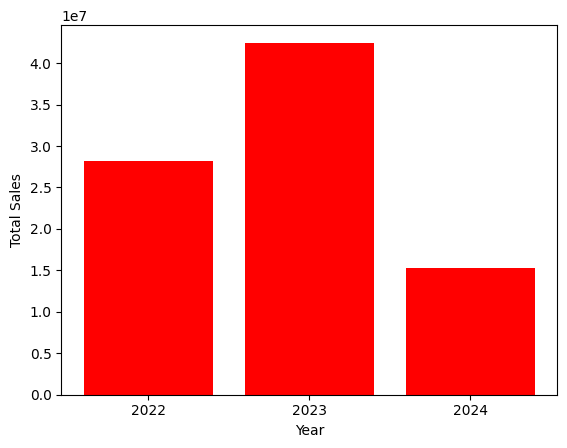

In [23]:
plt.bar(df_groupby['year'], df_groupby['liters_sold'], color='r')
plt.xticks(ticks=df_groupby['year'])
plt.xlabel("Year")
plt.ylabel("Total Sales")


In [24]:
df_groupby_month=df.groupby(["month"])["liters_sold"].sum().to_frame()

In [25]:
df_groupby_month.reset_index(inplace=True)

In [26]:
df_groupby_month

,month,liters_sold
0,1,6.519370e+06
1,2,6.190510e+06
2,3,6.815837e+06
3,4,7.864340e+06
4,5,7.456663e+06
5,6,7.422600e+06
6,7,9.141433e+06
7,8,6.973163e+06
8,9,6.612787e+06
9,10,7.706707e+06


Text(0, 0.5, 'Total Sales')

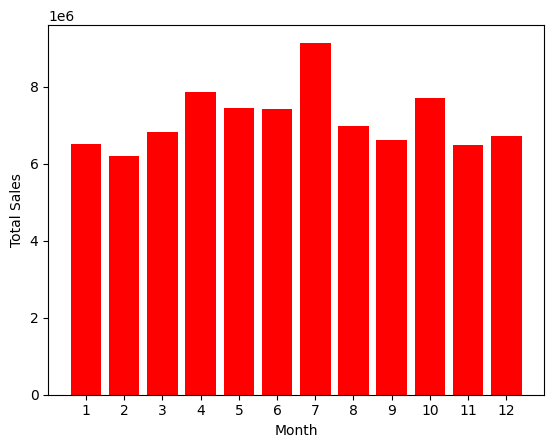

In [27]:
plt.bar(df_groupby_month['month'], df_groupby_month['liters_sold'], color='r')
plt.xticks(df_groupby_month["month"])
plt.xlabel("Month")
plt.ylabel("Total Sales")


In [28]:
df_groupby_product=df.groupby(["product"])["liters_sold"].sum().to_frame()

In [29]:
df_groupby_product.reset_index(inplace=True)

In [30]:
df_groupby_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   product      9 non-null      category
 1   liters_sold  9 non-null      float64 
dtypes: category(1), float64(1)
memory usage: 581.0 bytes


In [31]:
df_groupby_product['product'] = df_groupby_product["product"].astype(str)

Text(0, 0.5, 'Total Sales')

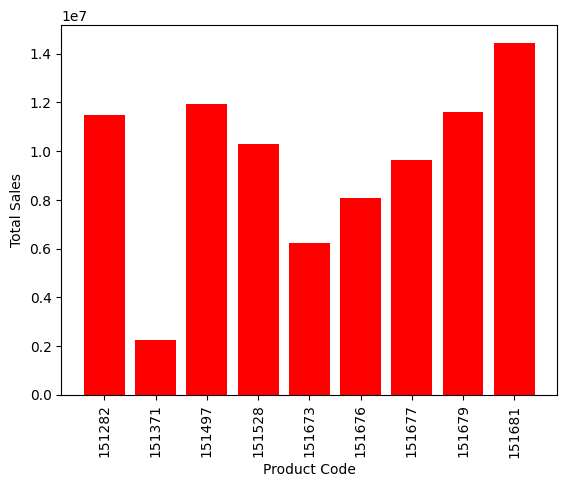

In [32]:
plt.bar(df_groupby_product['product'], df_groupby_product['liters_sold'], color='r',align="center")
plt.xticks(df_groupby_product["product"],rotation=90)
plt.xlabel("Product Code")
plt.ylabel("Total Sales")


In [33]:
df

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week,season,lastDay_of_month,firstDay_of_month,lastWeek_of_month,firstWeek_of_month,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,isEnd_of_yearWeek,isHolidays
0,2022-05-22,1698,5660.000000,6070.500000,151679,10198,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
1,2022-05-22,437,1456.666667,447.300000,151679,11283,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
2,2022-05-22,571,1903.333333,497.000000,151679,10204,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
3,2022-05-22,155,516.666667,0.000000,151679,10713,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
4,2022-05-22,666,2220.000000,4487.200000,151679,20122,5,2022,20,spring,2022-05-31,2022-05-01,22,17,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50825,2024-05-12,1097,3656.666667,666.666667,151371,20067,5,2024,19,spring,2024-05-31,2024-05-01,22,18,0,0,0,0,0
50826,2024-05-12,1183,3943.333333,133.333333,151371,20102,5,2024,19,spring,2024-05-31,2024-05-01,22,18,0,0,0,0,0
50827,2024-05-12,672,2240.000000,0.000000,151371,19987,5,2024,19,spring,2024-05-31,2024-05-01,22,18,0,0,0,0,0
50828,2024-05-12,798,2660.000000,866.666667,151371,19914,5,2024,19,spring,2024-05-31,2024-05-01,22,18,0,0,0,0,0


In [34]:
df_groupby_season=df.groupby(["season"])["liters_sold"].sum().to_frame()
df_groupby_season.reset_index(inplace=True)

Text(0, 0.5, 'Total Sales')

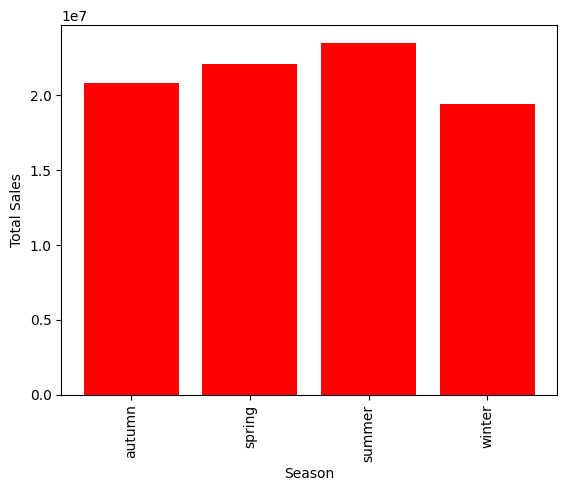

In [35]:
plt.bar(df_groupby_season['season'], df_groupby_season['liters_sold'], color='r',align="center")
plt.xticks(df_groupby_season["season"],rotation=90)
plt.xlabel("Season")
plt.ylabel("Total Sales")


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50830 entries, 0 to 50829
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  50830 non-null  datetime64[ns]
 1   number_of_customer    50830 non-null  int64         
 2   liters_sold           50830 non-null  float64       
 3   liters_sold_lastYear  50830 non-null  float64       
 4   product               50830 non-null  category      
 5   distributor           50830 non-null  category      
 6   month                 50830 non-null  int64         
 7   year                  50830 non-null  int64         
 8   week                  50830 non-null  UInt32        
 9   season                50830 non-null  object        
 10  lastDay_of_month      50830 non-null  datetime64[ns]
 11  firstDay_of_month     50830 non-null  datetime64[ns]
 12  lastWeek_of_month     50830 non-null  UInt32        
 13  firstWeek_of_mon

In [37]:
import seaborn as sns

<Axes: xlabel='liters_sold'>

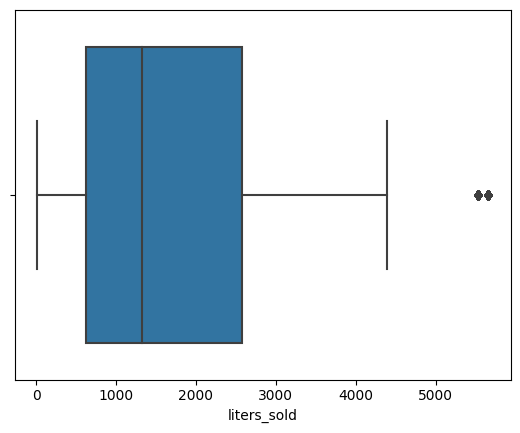

In [38]:
sns.boxplot(x=df["liters_sold"])


In [39]:
Q1=df["liters_sold"].quantile(0.05) #birinci çeyreklik
Q3=df["liters_sold"].quantile(0.95) #üçüncü çeyreklik
df_liters=df["liters_sold"]
IQR=Q3-Q1 #çeyrekler açıklığı
lowerLimit=Q1-1.5*IQR
upperLimit=Q3+1.5*IQR
print(lowerLimit,upperLimit,Q1,Q3)

-5540.0000000000055 9846.666666666675 230.0 4076.66666666667


In [40]:
outlierValue=((df_liters<lowerLimit) | (df_liters>upperLimit))

In [41]:
df_liters[outlierValue] # aykırı değer yok

Series([], Name: liters_sold, dtype: float64)

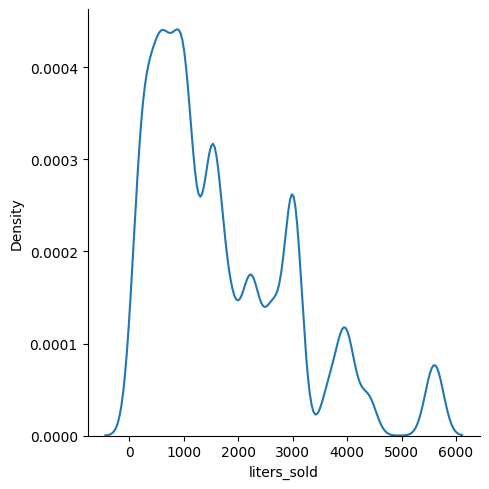

In [42]:
sns.displot(df_liters,kind="kde") # diğer değişkene göre normal dağılıma daha yakındır

<Axes: xlabel='liters_sold_lastYear'>

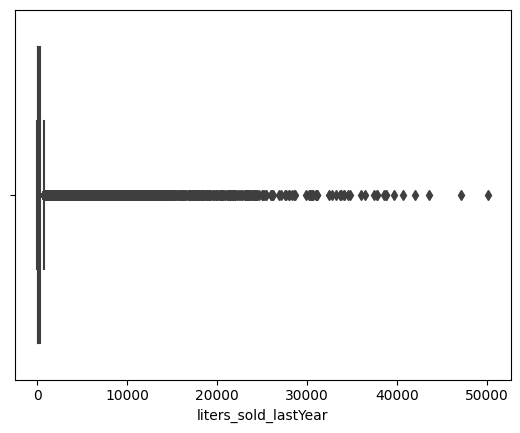

In [43]:
sns.boxplot(x=df["liters_sold_lastYear"])


In [44]:
Q1_1=df["liters_sold_lastYear"].quantile(0.05)
Q3_1=df["liters_sold_lastYear"].quantile(0.95)
df_liter_1=df["liters_sold_lastYear"]
IQR=Q3_1-Q1_1
lowerLimit_1=Q1_1-1.5*IQR
upperLimit_1=Q3_1+1.5*IQR
print(lowerLimit_1,upperLimit_1,Q1_1,Q3_1)

-3621.0 6035.0 0.0 2414.0


In [45]:
outlierValue=((df_liter_1<lowerLimit_1) | (df_liter_1>upperLimit_1))
df_liter_1[outlierValue]

0         6070.5
44        6177.0
62        6361.6
84        8015.9
124       6823.1
          ...   
20389    11331.6
20391     6162.8
20414    23117.6
20438     7156.8
20486     9570.8
Name: liters_sold_lastYear, Length: 913, dtype: float64

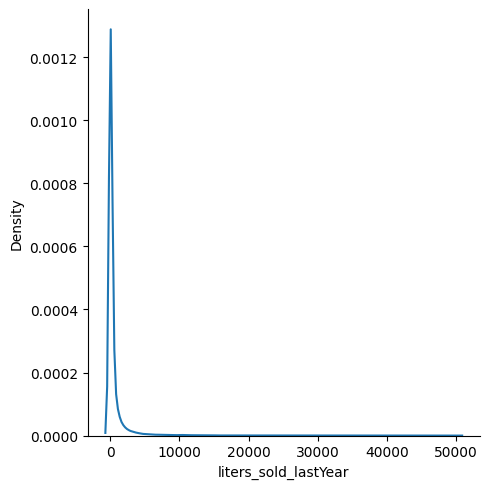

In [46]:
sns.displot(df_liter_1,kind="kde") 

In [47]:
cozunur = ['product', 'distributor']
zaman_cozunur = ['date']
zaman = zaman_cozunur[0]
hedef = ["liters_sold"]
h = hedef[0]

df = df.sort_values(by=cozunur + [zaman])

display(df)

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week,season,lastDay_of_month,firstDay_of_month,lastWeek_of_month,firstWeek_of_month,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,isEnd_of_yearWeek,isHolidays
26127,2022-07-03,94,313.333333,30.0,151282,9901,7,2022,26,summer,2022-07-31,2022-07-01,30,26,0,1,0,0,0
26487,2022-08-07,94,313.333333,60.0,151282,9901,8,2022,31,summer,2022-08-31,2022-08-01,35,31,0,1,0,0,0
26811,2022-09-11,94,313.333333,0.0,151282,9901,9,2022,36,autumn,2022-09-30,2022-09-01,39,35,0,0,0,0,0
27162,2022-10-23,94,313.333333,0.0,151282,9901,10,2022,42,autumn,2022-10-31,2022-10-01,44,39,0,0,0,0,0
27350,2022-11-13,94,313.333333,0.0,151282,9901,11,2022,45,autumn,2022-11-30,2022-11-01,48,44,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19930,2024-04-14,895,2983.333333,4402.0,151681,20254,4,2024,15,spring,2024-04-30,2024-04-01,18,14,0,0,0,0,0
20037,2024-04-21,895,2983.333333,9599.2,151681,20254,4,2024,16,spring,2024-04-30,2024-04-01,18,14,0,0,0,0,0
20148,2024-04-28,895,2983.333333,4260.0,151681,20254,4,2024,17,spring,2024-04-30,2024-04-01,18,14,0,0,0,0,0
20303,2024-05-05,895,2983.333333,3606.8,151681,20254,5,2024,18,spring,2024-05-31,2024-05-01,22,18,0,1,0,0,0


In [48]:
def add_time_features_to_data(dataframe):
    """Son 52, 26, 13, 5 haftalık nokta-sku'ların litre bazında moving average'ları alınarak özellikleri veriye ekler."""
    weeks = [52, 26, 13, 5]

    for week in weeks:
        dataframe[f"{week}_ma_litre"] = dataframe.groupby(cozunur, observed=False)[h].rolling(window=week, min_periods=1).mean().reset_index(drop=True)
    for week in weeks:
        dataframe.fillna({f"{week}_ma_litre": 0}, inplace=True)
    return dataframe.sort_values(by=cozunur + [zaman]).reset_index(drop=True)

df = add_time_features_to_data(df)

display(df)

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week,season,...,firstWeek_of_month,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,isEnd_of_yearWeek,isHolidays,52_ma_litre,26_ma_litre,13_ma_litre,5_ma_litre
0,2022-07-03,94,313.333333,30.0,151282,9901,7,2022,26,summer,...,26,0,1,0,0,0,5533.333333,5533.333333,5533.333333,5533.333333
1,2022-08-07,94,313.333333,60.0,151282,9901,8,2022,31,summer,...,31,0,1,0,0,0,2973.333333,2973.333333,2973.333333,2973.333333
2,2022-09-11,94,313.333333,0.0,151282,9901,9,2022,36,autumn,...,35,0,0,0,0,0,1046.666667,1046.666667,1046.666667,1046.666667
3,2022-10-23,94,313.333333,0.0,151282,9901,10,2022,42,autumn,...,39,0,0,0,0,0,1263.333333,1263.333333,1263.333333,1263.333333
4,2022-11-13,94,313.333333,0.0,151282,9901,11,2022,45,autumn,...,44,0,0,0,0,0,690.000000,690.000000,690.000000,690.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50825,2024-04-14,895,2983.333333,4402.0,151681,20254,4,2024,15,spring,...,14,0,0,0,0,0,1013.333333,1013.333333,1013.333333,1013.333333
50826,2024-04-21,895,2983.333333,9599.2,151681,20254,4,2024,16,spring,...,14,0,0,0,0,0,1520.000000,1520.000000,1520.000000,1520.000000
50827,2024-04-28,895,2983.333333,4260.0,151681,20254,4,2024,17,spring,...,14,0,0,0,0,0,1190.000000,1190.000000,1190.000000,1190.000000
50828,2024-05-05,895,2983.333333,3606.8,151681,20254,5,2024,18,spring,...,18,0,1,0,0,0,1600.000000,1600.000000,1600.000000,1600.000000


In [49]:
#df["liters_sold_lastWeek"]=df.groupby('distributor')["liters_sold"].shift(1) #disribütör üzerinden
#bir hafta kaydırma yapıyoruz yani geçen hafta yapmış olduğu satışları değişken olarak ekliyoruz

In [50]:
# Son 15 haftalık satışları oluşturma

def add_timeseries_features(dataframe):

    dataframe = dataframe.sort_values(by=cozunur + [zaman])

    for i in range(1, 16):
        col_name = f"lag_{i}_litre"
        dataframe[col_name] = dataframe.groupby(cozunur, observed=False)['liters_sold'].shift(i)
        dataframe[col_name].fillna(0, inplace=True)

    return dataframe.reset_index(drop=True)

df = add_timeseries_features(df)

display(df)

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week,season,...,lag_6_litre,lag_7_litre,lag_8_litre,lag_9_litre,lag_10_litre,lag_11_litre,lag_12_litre,lag_13_litre,lag_14_litre,lag_15_litre
0,2022-07-03,94,313.333333,30.0,151282,9901,7,2022,26,summer,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022-08-07,94,313.333333,60.0,151282,9901,8,2022,31,summer,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022-09-11,94,313.333333,0.0,151282,9901,9,2022,36,autumn,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2022-10-23,94,313.333333,0.0,151282,9901,10,2022,42,autumn,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022-11-13,94,313.333333,0.0,151282,9901,11,2022,45,autumn,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50825,2024-04-14,895,2983.333333,4402.0,151681,20254,4,2024,15,spring,...,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333
50826,2024-04-21,895,2983.333333,9599.2,151681,20254,4,2024,16,spring,...,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333
50827,2024-04-28,895,2983.333333,4260.0,151681,20254,4,2024,17,spring,...,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333
50828,2024-05-05,895,2983.333333,3606.8,151681,20254,5,2024,18,spring,...,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50830 entries, 0 to 50829
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  50830 non-null  datetime64[ns]
 1   number_of_customer    50830 non-null  int64         
 2   liters_sold           50830 non-null  float64       
 3   liters_sold_lastYear  50830 non-null  float64       
 4   product               50830 non-null  category      
 5   distributor           50830 non-null  category      
 6   month                 50830 non-null  int64         
 7   year                  50830 non-null  int64         
 8   week                  50830 non-null  UInt32        
 9   season                50830 non-null  object        
 10  lastDay_of_month      50830 non-null  datetime64[ns]
 11  firstDay_of_month     50830 non-null  datetime64[ns]
 12  lastWeek_of_month     50830 non-null  UInt32        
 13  firstWeek_of_mon

In [52]:
#df['moving_average_4'] = df.groupby('distributor')['liters_sold']
#.transform(lambda x: x.rolling(window=4).mean())


In [53]:
new_df=pd.get_dummies(df[["season"]],drop_first=True)


In [54]:
new_df

,season_spring,season_summer,season_winter
0,0,1,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
50825,1,0,0
50826,1,0,0
50827,1,0,0
50828,1,0,0


In [56]:
df=df.drop(["season"],axis=1)


KeyError: "['season'] not found in axis"

In [57]:
df=pd.concat([df,new_df],axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50830 entries, 0 to 50829
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  50830 non-null  datetime64[ns]
 1   number_of_customer    50830 non-null  int64         
 2   liters_sold           50830 non-null  float64       
 3   liters_sold_lastYear  50830 non-null  float64       
 4   product               50830 non-null  category      
 5   distributor           50830 non-null  category      
 6   month                 50830 non-null  int64         
 7   year                  50830 non-null  int64         
 8   week                  50830 non-null  UInt32        
 9   lastDay_of_month      50830 non-null  datetime64[ns]
 10  firstDay_of_month     50830 non-null  datetime64[ns]
 11  lastWeek_of_month     50830 non-null  UInt32        
 12  firstWeek_of_month    50830 non-null  UInt32        
 13  islastWeek_of_mo

In [59]:
new_types = {
    'date': 'category',
    'month':"category",
    'year':"category",
    'week':"category",

    
    
}

In [60]:
df=df.astype(new_types)

In [61]:
df.sort_values(by=["date","product","distributor"],inplace=True)

In [62]:
df.reset_index(inplace=True)

In [63]:
df=df.drop(["index"],axis=1)

In [64]:
df.head()

,date,number_of_customer,liters_sold,liters_sold_lastYear,product,distributor,month,year,week,lastDay_of_month,...,lag_9_litre,lag_10_litre,lag_11_litre,lag_12_litre,lag_13_litre,lag_14_litre,lag_15_litre,season_spring,season_summer,season_winter
0,2022-05-22,651,2170.000000,300.0,151282,9961,5,2022,20,2022-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2022-05-22,161,536.666667,0.0,151282,9994,5,2022,20,2022-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,2022-05-22,927,3090.000000,120.0,151282,10172,5,2022,20,2022-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,2022-05-22,792,2640.000000,30.0,151282,10176,5,2022,20,2022-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,2022-05-22,322,1073.333333,90.0,151282,10188,5,2022,20,2022-05-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [65]:
df=df.drop(["date","lastDay_of_month","firstDay_of_month","lastWeek_of_month","firstWeek_of_month"],axis=1)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50830 entries, 0 to 50829
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   number_of_customer    50830 non-null  int64   
 1   liters_sold           50830 non-null  float64 
 2   liters_sold_lastYear  50830 non-null  float64 
 3   product               50830 non-null  category
 4   distributor           50830 non-null  category
 5   month                 50830 non-null  category
 6   year                  50830 non-null  category
 7   week                  50830 non-null  category
 8   islastWeek_of_month   50830 non-null  int32   
 9   isFirstWeek_of_month  50830 non-null  int32   
 10  isNewYears_week       50830 non-null  int32   
 11  isEnd_of_yearWeek     50830 non-null  int32   
 12  isHolidays            50830 non-null  int32   
 13  52_ma_litre           50830 non-null  float64 
 14  26_ma_litre           50830 non-null  float64 
 15  13

In [67]:
cat_sütunlar = []
num_sütunlar = []
bin_sütunlar = []

def binary(sütun):
    return sütun.isin([0.0, 1.0]).all()

for col in df.columns:
    if df[col].dtype == 'category':
        cat_sütunlar.append(col)
    elif binary(df[col]):
        bin_sütunlar.append(col)
    else:
        num_sütunlar.append(col)

print(f'Kategorik Değişkenler: {cat_sütunlar}')
print("------------------------------------------------------------------------")
print(f'Numerik Değişkenler: {num_sütunlar}')
print("------------------------------------------------------------------------")
print(f'Binary Değişkenler: {bin_sütunlar}')


Kategorik Değişkenler: ['product', 'distributor', 'month', 'year', 'week']
------------------------------------------------------------------------
Numerik Değişkenler: ['number_of_customer', 'liters_sold', 'liters_sold_lastYear', '52_ma_litre', '26_ma_litre', '13_ma_litre', '5_ma_litre', 'lag_1_litre', 'lag_2_litre', 'lag_3_litre', 'lag_4_litre', 'lag_5_litre', 'lag_6_litre', 'lag_7_litre', 'lag_8_litre', 'lag_9_litre', 'lag_10_litre', 'lag_11_litre', 'lag_12_litre', 'lag_13_litre', 'lag_14_litre', 'lag_15_litre']
------------------------------------------------------------------------
Binary Değişkenler: ['islastWeek_of_month', 'isFirstWeek_of_month', 'isNewYears_week', 'isEnd_of_yearWeek', 'isHolidays', 'season_spring', 'season_summer', 'season_winter']


In [68]:
df_numerik = df[num_sütunlar]


In [69]:


def aykırıdeğer_bulma(data, sütun_adı, q1=0.05, q3=0.95):
    Q1 = data[sütun_adı].quantile(q1)
    Q3 = data[sütun_adı].quantile(q3)
    IQR = Q3 - Q1
    alt = Q1 - 1.5 * IQR
    üst = Q3 + 1.5 * IQR
    outliers = data[(data[sütun_adı] < alt) | (data[sütun_adı] > üst)]
    return outliers

for col in df_numerik.columns:
    outliers = aykırıdeğer_bulma(df_numerik, col)
    if not outliers.empty:
        print(f"{col} sütununda toplam aykırı değer sayısı: {len(outliers)}")
        print(f"{col} sütununda aykırı değerler:")
        print(outliers)
        print("------------------------------------------------------------------------")
    else:
        print(f"{col} sütununda aykırı değer bulunmuyor.")
        print("------------------------------------------------------------------------")


number_of_customer sütununda aykırı değer bulunmuyor.
------------------------------------------------------------------------
liters_sold sütununda aykırı değer bulunmuyor.
------------------------------------------------------------------------
liters_sold_lastYear sütununda toplam aykırı değer sayısı: 913
liters_sold_lastYear sütununda aykırı değerler:
       number_of_customer  liters_sold  liters_sold_lastYear  52_ma_litre  \
372                  1698  5660.000000                6070.5   313.333333   
411                  1317  4390.000000                8015.9  2170.000000   
448                  1171  3903.333333                6361.6  2170.000000   
455                  1223  4076.666667                6177.0   406.666667   
477                  1660  5533.333333                6191.2   426.666667   
...                   ...          ...                   ...          ...   
50775                 877  2923.333333                9883.2   746.666667   
50809                 798 

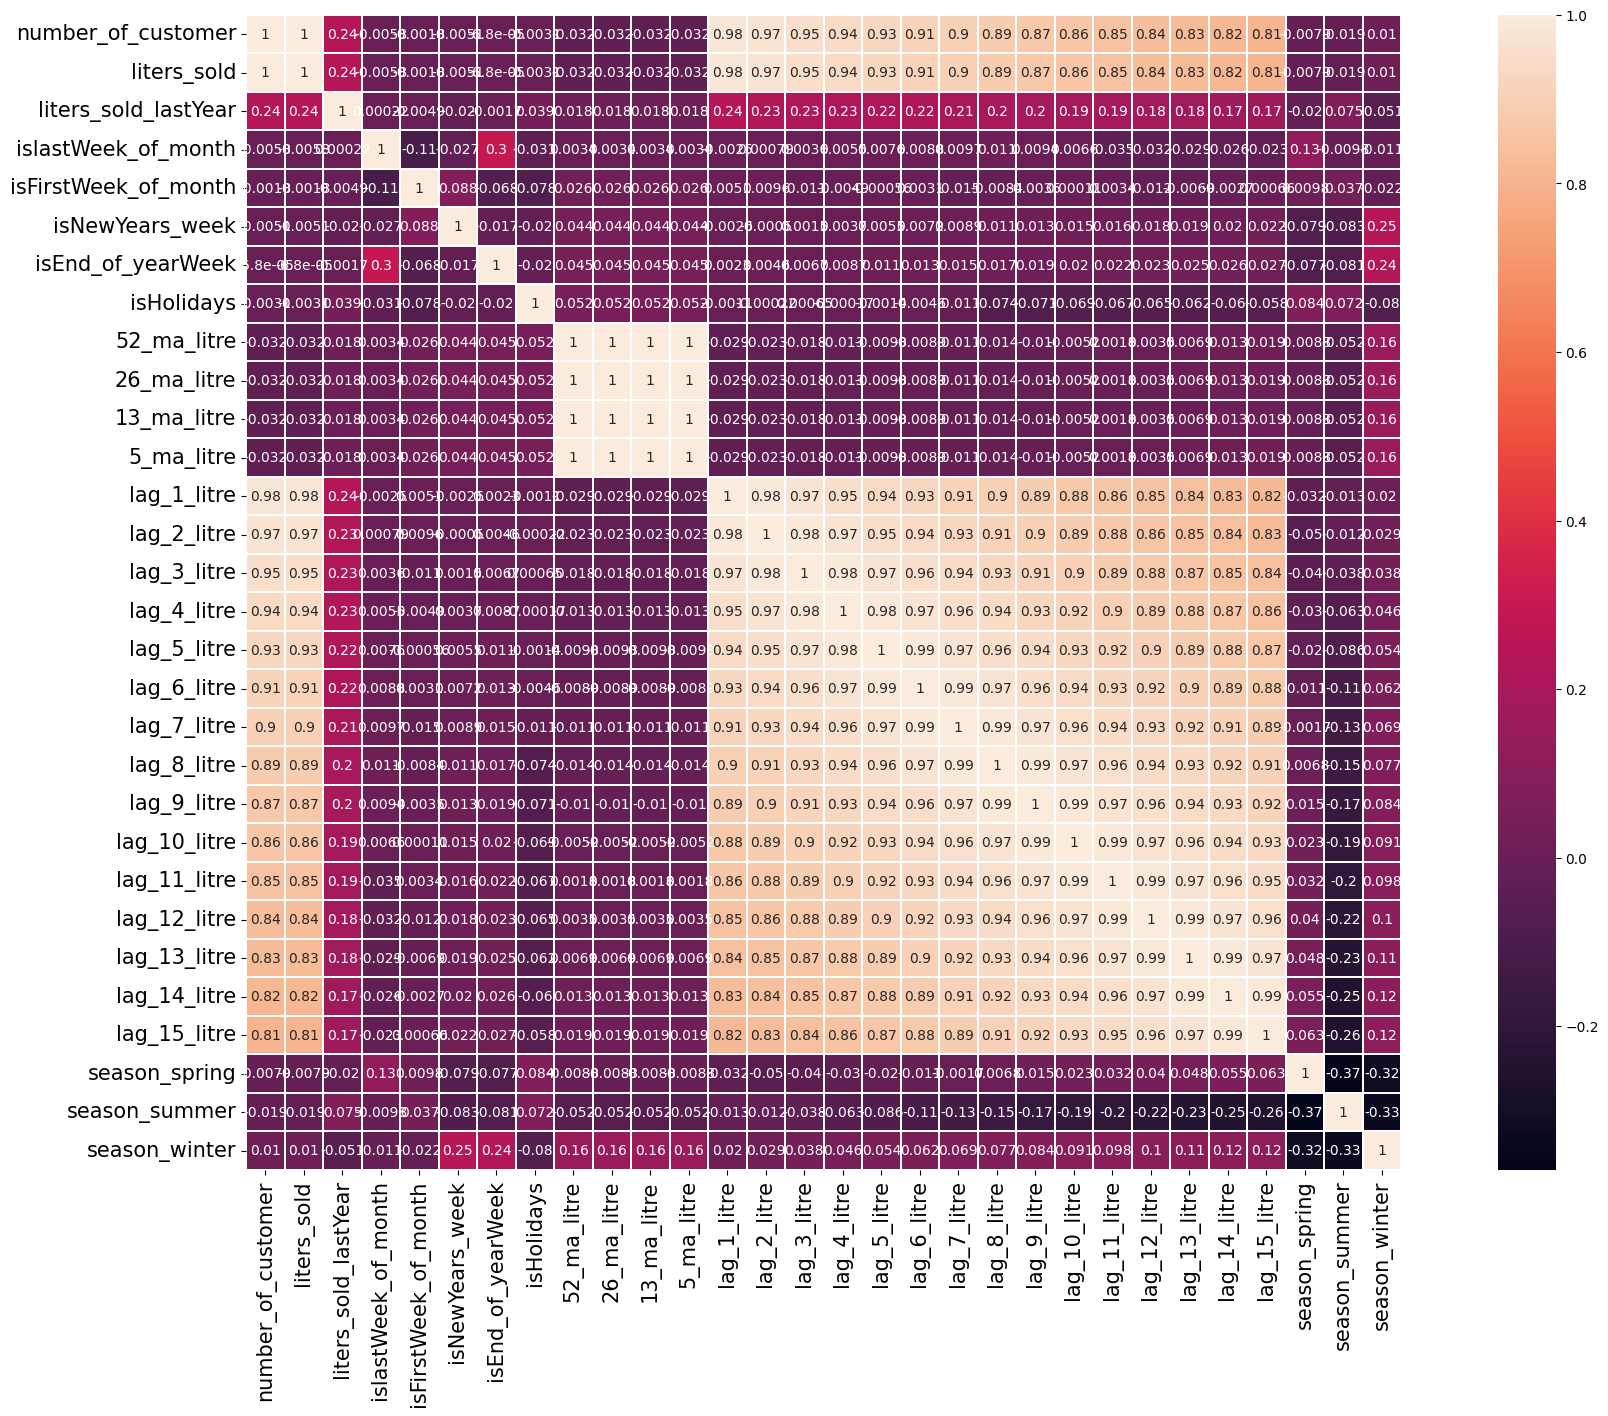

In [71]:
df_heatmap = df.drop(columns=cat_sütunlar)

plt.figure(figsize=(25, 15))
sns.heatmap(df_heatmap.astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, linecolor='white', annot=True, annot_kws={"size": 10})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [74]:
y = df['liters_sold']
X = df.drop(["liters_sold"],axis=1)


train_index = 40000   #%80 train %20 eğitim seti için ayırdım.

X_train = X[:train_index]
X_test = X[train_index:]

y_train = y[:train_index]
y_test = y[train_index:]

In [75]:
X_train.shape

(40000, 34)

In [76]:
X_test.shape

(10830, 34)

In [185]:
X_train.head(1)  #test seti için ilk gözlem tarihi 

,number_of_customer,liters_sold_lastYear,product,distributor,month,year,week,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,...,lag_9_litre,lag_10_litre,lag_11_litre,lag_12_litre,lag_13_litre,lag_14_litre,lag_15_litre,season_spring,season_summer,season_winter
0,651,300.0,151282,9961,5,2022,20,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [186]:
X_train.tail(1) #eğitim seti için son gözlem tarihi  

,number_of_customer,liters_sold_lastYear,product,distributor,month,year,week,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,...,lag_9_litre,lag_10_litre,lag_11_litre,lag_12_litre,lag_13_litre,lag_14_litre,lag_15_litre,season_spring,season_summer,season_winter
39999,42,0.0,151681,9900,12,2023,48,0,1,0,...,140.0,140.0,140.0,140.0,140.0,140.0,140.0,0,0,1


In [79]:
X_test.head(1) #test seti için ilk gözlem tarihi  

,number_of_customer,liters_sold_lastYear,product,distributor,month,year,week,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,...,lag_9_litre,lag_10_litre,lag_11_litre,lag_12_litre,lag_13_litre,lag_14_litre,lag_15_litre,season_spring,season_summer,season_winter
40000,94,170.4,151681,9901,12,2023,48,0,1,0,...,313.333333,313.333333,313.333333,313.333333,313.333333,313.333333,313.333333,0,0,1


In [80]:
X_test.tail(1) #test seti için son gözlem tarihi  

,number_of_customer,liters_sold_lastYear,product,distributor,month,year,week,islastWeek_of_month,isFirstWeek_of_month,isNewYears_week,...,lag_9_litre,lag_10_litre,lag_11_litre,lag_12_litre,lag_13_litre,lag_14_litre,lag_15_litre,season_spring,season_summer,season_winter
50829,895,1391.6,151681,20254,5,2024,19,0,0,0,...,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,2983.333333,1,0,0


In [81]:
regression=LinearRegression()  
model=regression.fit(X_train,y_train)
model

LinearRegression()

In [82]:
model.coef_

array([ 3.33333333e+00, -8.55134795e-18,  4.40694524e-15,  2.06408269e-17,
       -3.56742173e-14,  4.19628388e-13,  1.53118544e-14,  1.86730503e-13,
        1.91625864e-13,  2.01320581e-13, -7.11632239e-13,  6.76803071e-13,
       -3.90415313e-02,  1.33975920e-02,  1.16298183e-02,  1.40141211e-02,
        9.50081926e-15, -8.69988525e-17, -1.04566113e-15, -1.69821881e-16,
       -1.04582493e-16,  2.39269494e-16, -8.06051094e-17, -1.61671306e-16,
       -4.88029587e-16, -4.43687333e-16,  1.11921730e-16, -7.27116232e-17,
       -3.94611273e-16,  1.64224300e-16,  1.00702071e-15, -5.94488058e-13,
        9.66479391e-14,  5.11021663e-14])

In [83]:
model.intercept_

-1.4415491023100913e-09

In [84]:
from sklearn.metrics import mean_squared_error,r2_score


In [85]:
model.score(X_train,y_train)

1.0

In [86]:
r2_score(y_test,model.predict(X_test))

1.0

In [87]:
RMSE=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
RMSE
# train error

5.8171145937848363e-11

In [88]:
RMSE=np.sqrt(mean_squared_error(model.predict(X_test),y_test))
RMSE
# test error


5.929773164212279e-11

In [93]:
model_RG=RandomForestRegressor().fit(X_train,y_train)

In [94]:
model_RG.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [444]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versioncha

In [95]:
y_pred=model_RG.predict(X_test)


In [96]:
np.sqrt(mean_squared_error(y_test,y_pred))#test hatası   

0.0004529805083260097

In [97]:
np.sqrt(mean_squared_error(y_train,model_RG.predict(X_train)))#eğitim hatası

0.008632947224308001

In [98]:
model_RG.score(X_train,y_train)

0.9999999999565093

In [99]:
model_RG.score(X_test,y_test)

0.9999999999998858

In [102]:
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV

In [472]:
# X_train=X_train.drop(["lag_15_litre","lag_14_litre","lag_13_litre","lag_12_litre","lag_11_litre","lag_10_litre",
#              "lag_9_litre","lag_8_litre","lag_7_litre","lag_6_litre","lag_5_litre","lag_4_litre","lag_3_litre",
#              "lag_2_litre","52_ma_litre","26_ma_litre","13_ma_litre","lag_1_litre"],axis=1)
# X_test=X_test.drop(["lag_15_litre","lag_14_litre","lag_13_litre","lag_12_litre","lag_11_litre","lag_10_litre",
#              "lag_9_litre","lag_8_litre","lag_7_litre","lag_6_litre","lag_5_litre","lag_4_litre","lag_3_litre",
#              "lag_2_litre","52_ma_litre","26_ma_litre","13_ma_litre","lag_1_litre"],axis=1)

C:\Users\msı\AppData\Local\Temp\ipykernel_5968\2095593425.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), linewidths=0.1, vmax=1.0,


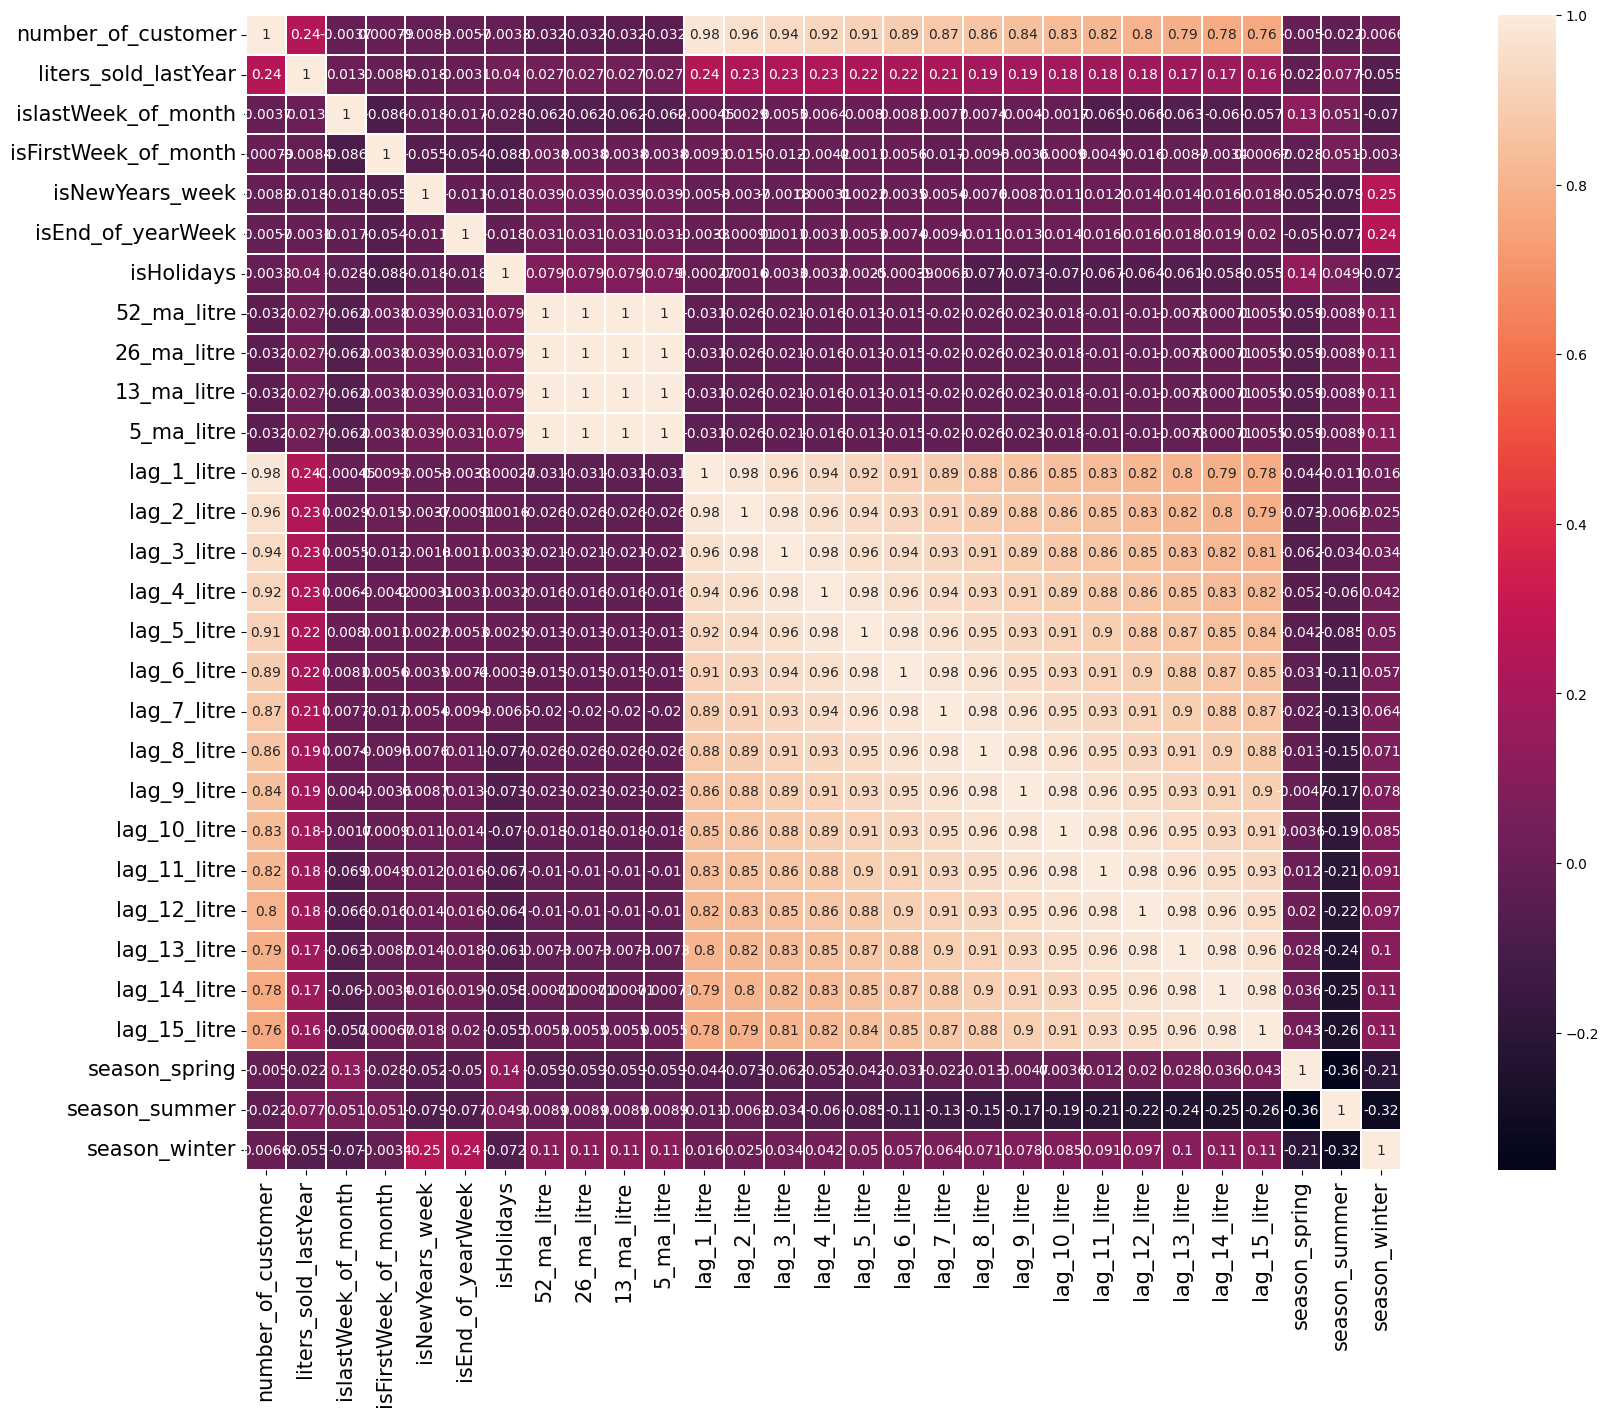

In [100]:


plt.figure(figsize=(25, 15))
sns.heatmap(X_train.corr(), linewidths=0.1, vmax=1.0,
            square=True, linecolor='white', annot=True, annot_kws={"size": 10})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [103]:
tcsv=TimeSeriesSplit(n_splits=5)

In [334]:
model_fr=RandomForestRegressor(bootstrap=True)
params={"max_depth":[3,4,5],
       "max_features":[0.05,0.1,0.2,"sqrt","log2"],
       "n_estimators":[50,100,120],
       "min_samples_split":[20,25,30],
       "min_samples_leaf":[5,7,10]}
model_cv=GridSearchCV(model_fr,params,cv=tcsv,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


In [335]:
model_cv.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 25,
 'n_estimators': 50}

In [174]:
final_model=RandomForestRegressor(max_depth=4,max_features=0.1,min_samples_split=20,n_estimators=100,min_samples_leaf=6,bootstrap=True).fit(X_train,y_train)

In [175]:
y_pred=final_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))#eğitim hatası

293.9782496112995

In [176]:
y_pred=final_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))#test hatası

148.68531957429565

In [177]:
final_model.score(X_train,y_train)

0.9495678162194372

In [178]:
final_model.score(X_test,y_test)


0.9876870357547057

In [179]:
importances=final_model.feature_importances_
features = X_train.columns


In [180]:
importances

array([8.78010436e-02, 5.02614627e-03, 3.95652118e-03, 1.14652898e-02,
       6.49186279e-04, 5.52111184e-04, 2.57039905e-04, 1.99757768e-08,
       4.22732019e-07, 1.44058252e-06, 0.00000000e+00, 1.75015321e-05,
       1.32327295e-04, 7.54289010e-05, 1.14670068e-05, 7.48044831e-05,
       9.26604738e-02, 1.01243189e-01, 8.95820524e-02, 8.62066424e-02,
       4.28409479e-02, 5.29937015e-02, 6.63573132e-02, 3.87611865e-02,
       6.70336313e-02, 6.36587938e-02, 4.78675596e-02, 3.66508864e-02,
       3.89700310e-02, 3.19513444e-02, 3.31053554e-02, 4.83700664e-05,
       1.98192308e-05, 2.79512058e-05])

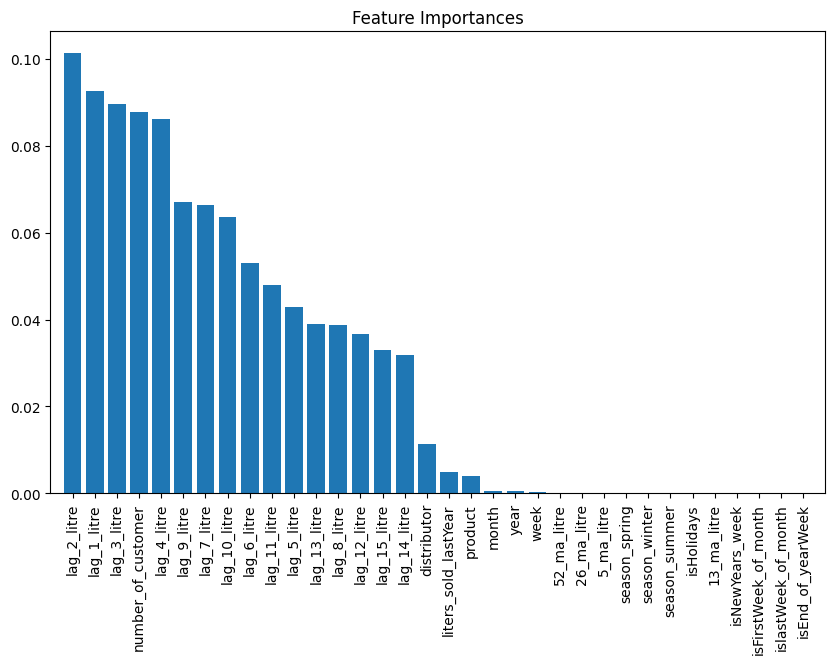

In [181]:
# Değişken önem oranlarına göre sıralama yapalım
indices = np.argsort(importances)[::-1]

# Grafiği oluşturalım
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [182]:
from lightgbm import LGBMRegressor


In [183]:
model_LGM=LGBMRegressor().fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3023
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 34
[LightGBM] [Info] Start training from score 1689.037831


In [184]:
model_LGM.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
?LGBMRegressor

In [115]:
y_pred=model_LGM.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred)) #eğitim hatası

0.039284181792940194

In [116]:
y_pred=model_LGM.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)) #test hatası

0.038198803008854386

In [117]:
params={"learning_rate":[0.01,0.1,0.5],
       "n_estimators":[20,100,200],
       "max_depth":[1,2,3,4,6],
       }

In [118]:
model1=LGBMRegressor()

model_cv=GridSearchCV(model1,params,cv=tcsv,n_jobs=-1,verbose=2).fit(X_train,y_train)
model_cv.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3023
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 34
[LightGBM] [Info] Start training from score 1689.037831
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

In [120]:
model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

In [121]:
final_model=LGBMRegressor(learning_rate=0.1,max_depth=6,n_estimators=200).fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3023
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 34
[LightGBM] [Info] Start training from score 1689.037831
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [125]:
y_pred=final_model.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [126]:
np.sqrt(mean_squared_error(y_test,y_pred)) #test hatası


0.0026751657349975313

In [127]:
final_model.score(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.9999999999954826

In [128]:
final_model.score(X_test,y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.9999999999960141

In [129]:
from catboost import CatBoostRegressor

In [130]:
cat_sütunlar=[]
for col in X_train.columns:
    if df[col].dtype =='category':
        cat_sütunlar.append(col)

In [131]:
cat_sütunlar

['product', 'distributor', 'month', 'year', 'week']

In [132]:
model_CBR=CatBoostRegressor(cat_features=cat_sütunlar).fit(X_train,y_train)

Learning rate set to 0.073334
0:	learn: 1217.2961012	total: 293ms	remaining: 4m 52s
1:	learn: 1132.0759037	total: 405ms	remaining: 3m 22s
2:	learn: 1054.0638990	total: 511ms	remaining: 2m 49s
3:	learn: 980.7197956	total: 629ms	remaining: 2m 36s
4:	learn: 911.6920887	total: 743ms	remaining: 2m 27s
5:	learn: 848.2166040	total: 856ms	remaining: 2m 21s
6:	learn: 789.9724249	total: 970ms	remaining: 2m 17s
7:	learn: 735.0523592	total: 1.08s	remaining: 2m 14s
8:	learn: 684.8409527	total: 1.19s	remaining: 2m 11s
9:	learn: 636.7089028	total: 1.3s	remaining: 2m 8s
10:	learn: 592.3680085	total: 1.4s	remaining: 2m 6s
11:	learn: 551.2807600	total: 1.51s	remaining: 2m 4s
12:	learn: 513.6902559	total: 1.61s	remaining: 2m 2s
13:	learn: 478.3588870	total: 1.73s	remaining: 2m 1s
14:	learn: 445.8865687	total: 1.83s	remaining: 2m
15:	learn: 416.6705853	total: 1.98s	remaining: 2m 2s
16:	learn: 387.8770254	total: 2.09s	remaining: 2m
17:	learn: 361.3460917	total: 2.19s	remaining: 1m 59s
18:	learn: 336.314126

In [133]:
model_CBR.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType

In [134]:
y_pred=model_CBR.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))# eğitim hatası

1.6127831697778652

In [135]:
y_pred=model_CBR.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))# test hatası

0.6324585166374052

In [ ]:
# model1=CatBoostRegressor(cat_features=cat_sütunlar,task_type="CPU")
# params={"iterations":[500,1000,1500],"learning_rate":[0.1,0.5,0.7,1],"depth":[3,6,8]}
# model_cv=GridSearchCV(model1,params,cv=tcsv,n_jobs=-1,verbose=2).fit(X_train,y_train)


In [ ]:
#model_cv.best_params_

In [138]:
# final_model=CatBoostRegressor(iterations=1500,depth=3,learning_rate=0.5,cat_features=cat_sütunlar).fit(X_train,y_train)

0:	learn: 742.5336342	total: 21.9ms	remaining: 32.9s
1:	learn: 428.8188325	total: 46.3ms	remaining: 34.7s
2:	learn: 271.2695690	total: 66.3ms	remaining: 33.1s
3:	learn: 194.6335747	total: 90.7ms	remaining: 33.9s
4:	learn: 157.4633860	total: 113ms	remaining: 33.9s
5:	learn: 142.2514334	total: 135ms	remaining: 33.7s
6:	learn: 132.5614972	total: 159ms	remaining: 34s
7:	learn: 118.2990771	total: 184ms	remaining: 34.3s
8:	learn: 114.2210978	total: 210ms	remaining: 34.8s
9:	learn: 108.9607076	total: 244ms	remaining: 36.4s
10:	learn: 96.2527914	total: 285ms	remaining: 38.6s
11:	learn: 93.7109141	total: 335ms	remaining: 41.6s
12:	learn: 90.0355245	total: 387ms	remaining: 44.3s
13:	learn: 87.6460448	total: 429ms	remaining: 45.5s
14:	learn: 77.5428044	total: 453ms	remaining: 44.8s
15:	learn: 74.2615758	total: 500ms	remaining: 46.4s
16:	learn: 69.4793727	total: 552ms	remaining: 48.1s
17:	learn: 67.1312358	total: 599ms	remaining: 49.3s
18:	learn: 64.0480883	total: 648ms	remaining: 50.5s
19:	learn:

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_customer,50830.0,507.101338,394.716173,5.000000,188.000000,396.000000,774.000000,1698.0
liters_sold,50830.0,1690.337793,1315.720576,16.666667,626.666667,1320.000000,2580.000000,5660.0
liters_sold_lastYear,50830.0,565.017749,1967.102996,0.000000,13.200000,79.200000,316.800000,50182.8
islastWeek_of_month,50830.0,0.040921,0.198109,0.000000,0.000000,0.000000,0.000000,1.0
isFirstWeek_of_month,50830.0,0.214381,0.410396,0.000000,0.000000,0.000000,0.000000,1.0
isNewYears_week,50830.0,0.017234,0.130143,0.000000,0.000000,0.000000,0.000000,1.0
isEnd_of_yearWeek,50830.0,0.016624,0.127859,0.000000,0.000000,0.000000,0.000000,1.0
isHolidays,50830.0,0.022015,0.146732,0.000000,0.000000,0.000000,0.000000,1.0
52_ma_litre,50830.0,1690.337793,1315.720576,16.666667,626.666667,1320.000000,2580.000000,5660.0
26_ma_litre,50830.0,1690.337793,1315.720576,16.666667,626.666667,1320.000000,2580.000000,5660.0
